# Nome: Sophia Kerber Shigueoka
# Turma: 2A

## Introdução

Escolhi o Mercosul como objeto de estudo uma vez que o Brasil faz parte desta organição. Assim, imaginei que seria mais fácil formular as hipóteses e entender os dados de acordo com momentos históricos.

### Hipóteses (provavelmente vou usar a 2)

#### 1. Quando a Venezuela se juntou ao Mercosul, a emigração com destino a países com melhores condições de vida aumenta aos poucos devido a crise

## 2. Quando há algum problema econômico ou social em um país intgrante do Mercosul outros países do bloco são os que mais providenciam ajuda.

Mecanismo: Em geral, penso que por ser um bloco econômico que providencia facilidades para os membros, é provável que haja um tipo de empatia maior entre países do mercosul quando se trata de ajuda internacional

#### 3. Quando um país entra no Mercosul, os índices de violência dos outros integrantes permanecem quase iguais, e não aumentam significamente

In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors

#### Bases de dados usadas
ADICIONAR LINKS!

In [96]:
aid_rec = pd.read_excel('aid_received_total_us_inflation_adjusted.xlsx')
gdp = pd.read_excel('gdp_total_yearly_growth.xlsx')
murder = pd.read_excel('murder_per_100000_people.xlsx')
aid_g = pd.read_excel('aid_given_2007_us.xlsx')

##### Países Participantes do Mercosul: Brasil, Argetnina, Paraguai, Uruguai, Venezuela
##### Países Associados ao Mercosul: Bolivia, Chile, Colômbia, Equador, Guiana, Peru, Suriname


## HIPÓTESE #2

### Análise de Dados

In [97]:
aid_rec.tail(10)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
147,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.060000e+08,5.510000e+08,5.990000e+08,6.160000e+08,6.600000e+08,7.050000e+08,7.000000e+08,1.230000e+09,1.450000e+09,1.490000e+09
148,United Arab Emirates,4.340000e+06,5.530000e+06,4.240000e+06,3.810000e+06,4.850000e+06,1.200000e+05,1.100000e+07,1.320000e+07,1.040000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Uruguay,1.070000e+08,-6.510000e+06,1.150000e+07,7.900000e+07,3.160000e+07,2.490000e+06,3.690000e+07,3.690000e+07,3.060000e+08,...,3.340000e+07,2.830000e+07,4.480000e+07,4.070000e+07,1.620000e+07,1.570000e+07,3.190000e+07,7.850000e+07,2.320000e+07,1.830000e+07
150,Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.620000e+08,1.650000e+08,1.770000e+08,2.230000e+08,1.840000e+08,2.370000e+08,2.660000e+08,2.940000e+08,4.480000e+08,4.420000e+08
151,Vanuatu,1.590000e+06,2.870000e+06,4.050000e+06,4.980000e+06,6.120000e+06,5.170000e+06,1.840000e+07,1.680000e+07,2.120000e+07,...,5.680000e+07,9.170000e+07,1.040000e+08,9.740000e+07,7.030000e+07,7.850000e+07,7.430000e+07,8.490000e+07,1.870000e+08,1.260000e+08
152,Venezuela,-6.940000e+07,-1.390000e+08,4.970000e+08,3.110000e+08,-3.380000e+08,-5.140000e+07,1.790000e+08,1.150000e+08,3.250000e+08,...,6.810000e+07,5.310000e+07,5.430000e+07,4.900000e+07,4.360000e+07,4.640000e+07,3.440000e+07,3.820000e+07,3.660000e+07,4.330000e+07
153,Vietnam,1.220000e+09,1.110000e+09,1.150000e+09,1.420000e+09,1.510000e+09,1.870000e+09,2.970000e+09,2.570000e+09,2.420000e+09,...,2.360000e+09,2.260000e+09,3.320000e+09,2.590000e+09,2.960000e+09,3.360000e+09,3.590000e+09,3.770000e+09,3.160000e+09,2.780000e+09
154,Yemen,1.340000e+08,1.280000e+08,1.560000e+08,1.810000e+08,1.990000e+08,2.670000e+08,3.070000e+08,2.050000e+08,5.460000e+07,...,2.260000e+08,3.850000e+08,5.170000e+08,6.270000e+08,4.320000e+08,6.620000e+08,9.630000e+08,1.050000e+09,1.530000e+09,1.950000e+09
155,Zambia,9.730000e+06,9.320000e+06,5.800000e+07,5.250000e+07,1.980000e+08,9.960000e+07,2.430000e+08,5.070000e+08,2.580000e+08,...,9.720000e+08,1.020000e+09,1.200000e+09,8.800000e+08,9.390000e+08,8.930000e+08,1.040000e+09,9.190000e+08,7.970000e+08,9.640000e+08
156,Zimbabwe,NaN,1.000000e+05,NaN,1.060000e+08,4.250000e+07,3.230000e+07,2.910000e+06,2.880000e+06,1.650000e+07,...,4.630000e+08,5.900000e+08,7.340000e+08,6.850000e+08,6.550000e+08,9.290000e+08,7.590000e+08,6.970000e+08,7.880000e+08,6.670000e+08


In [98]:
aid_rec.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1.050000e+02,1.120000e+02,1.050000e+02,1.110000e+02,1.080000e+02,1.090000e+02,1.170000e+02,1.180000e+02,1.140000e+02,1.160000e+02,...,1.440000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.390000e+02,1.390000e+02,1.390000e+02
mean,2.388747e+08,2.675342e+08,2.965097e+08,3.031461e+08,3.197604e+08,3.390901e+08,3.197394e+08,3.187975e+08,3.138600e+08,2.848859e+08,...,5.363866e+08,5.749292e+08,5.902862e+08,5.900405e+08,6.126369e+08,6.053326e+08,6.684304e+08,6.606873e+08,6.986357e+08,7.464127e+08
std,6.622762e+08,6.324382e+08,6.393259e+08,7.590638e+08,8.836919e+08,8.963533e+08,8.364709e+08,8.811672e+08,6.690106e+08,6.232124e+08,...,9.977373e+08,9.954865e+08,8.727628e+08,8.667577e+08,9.283830e+08,8.470634e+08,9.702299e+08,9.218347e+08,9.359458e+08,1.152097e+09
min,-7.860000e+07,-1.390000e+08,-6.320000e+07,-1.590000e+07,-3.380000e+08,-5.070000e+08,-1.070000e+08,-9.340000e+06,7.000000e+04,-9.200000e+05,...,-2.830000e+08,-5.000000e+08,-3.900000e+07,-1.290000e+08,-4.860000e+08,-6.160000e+07,-5.750000e+08,-8.750000e+08,-3.320000e+08,-6.970000e+08
25%,1.290000e+06,1.005500e+07,3.020000e+07,3.295000e+07,3.232500e+07,3.870000e+07,2.810000e+07,3.097500e+07,4.877500e+07,4.847500e+07,...,7.817500e+07,8.440000e+07,9.490000e+07,9.660000e+07,8.897500e+07,8.305000e+07,8.047500e+07,8.410000e+07,8.195000e+07,7.610000e+07
50%,5.050000e+07,6.135000e+07,7.700000e+07,7.590000e+07,1.065000e+08,1.130000e+08,1.070000e+08,1.075000e+08,1.195000e+08,1.065000e+08,...,2.185000e+08,2.690000e+08,2.810000e+08,2.950000e+08,3.040000e+08,2.580000e+08,2.590000e+08,2.840000e+08,3.340000e+08,3.080000e+08
75%,1.360000e+08,1.957500e+08,2.340000e+08,2.140000e+08,2.350000e+08,3.020000e+08,2.960000e+08,2.787500e+08,3.180000e+08,2.342500e+08,...,6.755000e+08,7.310000e+08,6.875000e+08,6.540000e+08,6.735000e+08,8.307500e+08,8.202500e+08,8.305000e+08,9.860000e+08,9.920000e+08
max,5.420000e+09,4.710000e+09,4.620000e+09,6.510000e+09,8.100000e+09,8.320000e+09,7.910000e+09,8.500000e+09,5.690000e+09,5.300000e+09,...,9.240000e+09,9.200000e+09,6.230000e+09,6.280000e+09,6.380000e+09,6.170000e+09,4.940000e+09,4.570000e+09,4.890000e+09,9.140000e+09


In [99]:
aid_rec.info

<bound method DataFrame.info of                             country          1960          1961          1962  \
0                       Afghanistan  1.130000e+08  2.300000e+08  1.130000e+08   
1                           Albania           NaN           NaN           NaN   
2                           Algeria  2.950000e+09  3.520000e+09  2.990000e+09   
3                            Angola -3.800000e+05  2.540000e+08           NaN   
4               Antigua and Barbuda           NaN           NaN           NaN   
5                         Argentina  1.310000e+08  1.900000e+08  2.070000e+08   
6                           Armenia           NaN           NaN           NaN   
7                        Azerbaijan           NaN           NaN           NaN   
8                           Bahamas -4.200000e+05           NaN           NaN   
9                           Bahrain  1.020000e+06  9.620000e+06  1.330000e+07   
10                       Bangladesh           NaN           NaN           NaN

In [100]:
aid_rec.set_index("country", inplace=True)

In [101]:
aid_rec.loc[['Venezuela', 'Brazil', 'Uruguay', 'Paraguay', 'Argentina']]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Venezuela,-69400000.0,-1.390000e+08,4.970000e+08,3.110000e+08,-3.380000e+08,-5.140000e+07,1.790000e+08,1.150000e+08,3.250000e+08,7.950000e+07,...,68100000.0,53100000.0,54300000.0,49000000.0,43600000.0,4.640000e+07,34400000.0,38200000.0,3.660000e+07,43300000.0
Brazil,136000000.0,1.720000e+09,1.070000e+09,1.360000e+09,1.560000e+09,1.630000e+09,2.090000e+09,1.350000e+09,1.450000e+09,1.040000e+09,...,277000000.0,385000000.0,323000000.0,424000000.0,672000000.0,1.170000e+09,899000000.0,771000000.0,1.000000e+09,687000000.0
Uruguay,107000000.0,-6.510000e+06,1.150000e+07,7.900000e+07,3.160000e+07,2.490000e+06,3.690000e+07,3.690000e+07,3.060000e+08,1.110000e+08,...,33400000.0,28300000.0,44800000.0,40700000.0,16200000.0,1.570000e+07,31900000.0,78500000.0,2.320000e+07,18300000.0
Paraguay,74700000.0,5.880000e+07,2.380000e+07,6.460000e+07,6.480000e+07,6.180000e+07,7.860000e+07,1.140000e+08,1.230000e+08,1.060000e+08,...,103000000.0,122000000.0,130000000.0,116000000.0,90400000.0,1.030000e+08,119000000.0,58100000.0,6.020000e+07,89100000.0
Argentina,131000000.0,1.900000e+08,2.070000e+08,2.860000e+08,7.960000e+07,-5.070000e+08,-1.070000e+08,1.430000e+08,2.060000e+08,1.330000e+08,...,79300000.0,102000000.0,98200000.0,109000000.0,81700000.0,1.590000e+08,31700000.0,42800000.0,-1.890000e+07,3940000.0


In [102]:
aid_rec.loc[['Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Suriname']]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Bolivia,73600000.0,148000000.0,234000000.0,341000000.0,259000000.0,206000000.0,182000000.0,167000000.0,2.680000e+08,210000000.0,...,466000000.0,567000000.0,6.520000e+08,653000000.0,622000000.0,595000000.0,621000000.0,6.010000e+08,7.910000e+08,6.990000e+08
Chile,113000000.0,729000000.0,959000000.0,926000000.0,841000000.0,671000000.0,867000000.0,651000000.0,5.010000e+08,535000000.0,...,98600000.0,89200000.0,6.950000e+07,169000000.0,143000000.0,109000000.0,69000000.0,2.100000e+08,5.430000e+07,1.780000e+08
Colombia,-78200000.0,273000000.0,293000000.0,463000000.0,351000000.0,222000000.0,549000000.0,638000000.0,1.120000e+09,650000000.0,...,747000000.0,990000000.0,1.070000e+09,644000000.0,963000000.0,728000000.0,785000000.0,1.090000e+09,1.360000e+09,1.110000e+09
Ecuador,36900000.0,63900000.0,78200000.0,113000000.0,127000000.0,129000000.0,159000000.0,164000000.0,1.460000e+08,116000000.0,...,201000000.0,203000000.0,1.880000e+08,139000000.0,150000000.0,141000000.0,136000000.0,1.460000e+08,3.180000e+08,2.420000e+08
Guyana,79700000.0,91100000.0,77000000.0,54800000.0,42400000.0,50900000.0,65200000.0,72400000.0,9.940000e+07,112000000.0,...,120000000.0,149000000.0,1.630000e+08,154000000.0,135000000.0,104000000.0,90800000.0,1.320000e+08,3.210000e+07,6.980000e+07
Peru,-78600000.0,-130000000.0,36300000.0,75900000.0,163000000.0,394000000.0,286000000.0,329000000.0,3.250000e+08,230000000.0,...,313000000.0,421000000.0,4.130000e+08,-129000000.0,514000000.0,362000000.0,333000000.0,3.010000e+08,3.350000e+08,3.270000e+08
Suriname,112000000.0,124000000.0,103000000.0,148000000.0,117000000.0,148000000.0,27700000.0,29000000.0,1.430000e+08,135000000.0,...,130000000.0,82800000.0,1.310000e+08,90700000.0,75000000.0,35900000.0,26300000.0,1.130000e+07,1.600000e+07,1.650000e+07


In [103]:
aid_rec.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1.050000e+02,1.120000e+02,1.050000e+02,1.110000e+02,1.080000e+02,1.090000e+02,1.170000e+02,1.180000e+02,1.140000e+02,1.160000e+02,...,1.440000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.390000e+02,1.390000e+02,1.390000e+02
mean,2.388747e+08,2.675342e+08,2.965097e+08,3.031461e+08,3.197604e+08,3.390901e+08,3.197394e+08,3.187975e+08,3.138600e+08,2.848859e+08,...,5.363866e+08,5.749292e+08,5.902862e+08,5.900405e+08,6.126369e+08,6.053326e+08,6.684304e+08,6.606873e+08,6.986357e+08,7.464127e+08
std,6.622762e+08,6.324382e+08,6.393259e+08,7.590638e+08,8.836919e+08,8.963533e+08,8.364709e+08,8.811672e+08,6.690106e+08,6.232124e+08,...,9.977373e+08,9.954865e+08,8.727628e+08,8.667577e+08,9.283830e+08,8.470634e+08,9.702299e+08,9.218347e+08,9.359458e+08,1.152097e+09
min,-7.860000e+07,-1.390000e+08,-6.320000e+07,-1.590000e+07,-3.380000e+08,-5.070000e+08,-1.070000e+08,-9.340000e+06,7.000000e+04,-9.200000e+05,...,-2.830000e+08,-5.000000e+08,-3.900000e+07,-1.290000e+08,-4.860000e+08,-6.160000e+07,-5.750000e+08,-8.750000e+08,-3.320000e+08,-6.970000e+08
25%,1.290000e+06,1.005500e+07,3.020000e+07,3.295000e+07,3.232500e+07,3.870000e+07,2.810000e+07,3.097500e+07,4.877500e+07,4.847500e+07,...,7.817500e+07,8.440000e+07,9.490000e+07,9.660000e+07,8.897500e+07,8.305000e+07,8.047500e+07,8.410000e+07,8.195000e+07,7.610000e+07
50%,5.050000e+07,6.135000e+07,7.700000e+07,7.590000e+07,1.065000e+08,1.130000e+08,1.070000e+08,1.075000e+08,1.195000e+08,1.065000e+08,...,2.185000e+08,2.690000e+08,2.810000e+08,2.950000e+08,3.040000e+08,2.580000e+08,2.590000e+08,2.840000e+08,3.340000e+08,3.080000e+08
75%,1.360000e+08,1.957500e+08,2.340000e+08,2.140000e+08,2.350000e+08,3.020000e+08,2.960000e+08,2.787500e+08,3.180000e+08,2.342500e+08,...,6.755000e+08,7.310000e+08,6.875000e+08,6.540000e+08,6.735000e+08,8.307500e+08,8.202500e+08,8.305000e+08,9.860000e+08,9.920000e+08
max,5.420000e+09,4.710000e+09,4.620000e+09,6.510000e+09,8.100000e+09,8.320000e+09,7.910000e+09,8.500000e+09,5.690000e+09,5.300000e+09,...,9.240000e+09,9.200000e+09,6.230000e+09,6.280000e+09,6.380000e+09,6.170000e+09,4.940000e+09,4.570000e+09,4.890000e+09,9.140000e+09


In [104]:
aid_rec.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.130000e+08,2.300000e+08,1.130000e+08,2.340000e+08,2.990000e+08,367000000.0,335000000.0,257000000.0,180000000.0,161000000.0,...,5.030000e+09,4.740000e+09,6.230000e+09,6.280000e+09,6.380000e+09,6.170000e+09,4.740000e+09,4.570000e+09,4.240000e+09,4.060000e+09
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.870000e+08,3.150000e+08,3.160000e+08,3.300000e+08,3.200000e+08,3.120000e+08,2.380000e+08,2.450000e+08,3.340000e+08,1.670000e+08
Algeria,2.950000e+09,3.520000e+09,2.990000e+09,2.010000e+09,1.550000e+09,988000000.0,818000000.0,691000000.0,744000000.0,798000000.0,...,3.490000e+08,2.680000e+08,2.600000e+08,1.780000e+08,1.640000e+08,1.330000e+08,1.790000e+08,1.390000e+08,8.750000e+07,1.570000e+08
Angola,-3.800000e+05,2.540000e+08,NaN,2.300000e+05,NaN,11600000.0,27200000.0,166000000.0,80000.0,-920000.0,...,2.500000e+08,3.340000e+08,2.320000e+08,2.220000e+08,1.780000e+08,2.260000e+08,2.590000e+08,2.130000e+08,3.800000e+08,2.070000e+08
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.560000e+06,5.130000e+06,3.820000e+06,1.640000e+07,1.130000e+07,1.720000e+06,1.400000e+06,2.240000e+06,1.490000e+06,-4.900000e+05


In [105]:
aid_g.set_index("country", inplace=True)

In [106]:
aid_g.loc[['Germany', 'Japan', 'United States', 'United Kingdom']]

,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,,,,
Germany,2.870000e+09,1.750000e+09,1.740000e+09,1.820000e+09,2.620000e+09,2.880000e+09,2.970000e+09,5.000000e+09,3.600000e+09,3.850000e+09,...,4520000000,4580000000,3730000000,4.420000e+09,4.220000e+09,4.690000e+09,5310000000,5150000000,6310000000,5980000000
Japan,8.880000e+08,3.980000e+08,9.330000e+08,1.030000e+09,2.170000e+09,2.620000e+09,2.790000e+09,5.420000e+09,3.400000e+09,2.430000e+09,...,9910000000,8240000000,8130000000,7.940000e+09,7.280000e+09,6.970000e+09,7470000000,8590000000,7940000000,8870000000
United States,7.300000e+09,5.500000e+09,9.390000e+08,1.320000e+09,4.080000e+09,3.690000e+09,3.700000e+09,NaN,3.860000e+09,3.520000e+09,...,4880000000,7010000000,8180000000,6.660000e+09,8.820000e+09,1.340000e+10,19900000000,17900000000,17300000000,18600000000
United Kingdom,8.640000e+08,1.890000e+09,1.030000e+09,1.760000e+09,2.350000e+09,3.760000e+09,3.490000e+09,3.230000e+09,2.560000e+09,3.420000e+09,...,1970000000,1980000000,2340000000,1.950000e+09,2.820000e+09,3.150000e+09,3430000000,3470000000,3580000000,4970000000


In [107]:
aid_rec.loc[['Venezuela', 'Brazil', 'Uruguay', 'Paraguay', 'Argentina']]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Venezuela,-69400000.0,-1.390000e+08,4.970000e+08,3.110000e+08,-3.380000e+08,-5.140000e+07,1.790000e+08,1.150000e+08,3.250000e+08,7.950000e+07,...,68100000.0,53100000.0,54300000.0,49000000.0,43600000.0,4.640000e+07,34400000.0,38200000.0,3.660000e+07,43300000.0
Brazil,136000000.0,1.720000e+09,1.070000e+09,1.360000e+09,1.560000e+09,1.630000e+09,2.090000e+09,1.350000e+09,1.450000e+09,1.040000e+09,...,277000000.0,385000000.0,323000000.0,424000000.0,672000000.0,1.170000e+09,899000000.0,771000000.0,1.000000e+09,687000000.0
Uruguay,107000000.0,-6.510000e+06,1.150000e+07,7.900000e+07,3.160000e+07,2.490000e+06,3.690000e+07,3.690000e+07,3.060000e+08,1.110000e+08,...,33400000.0,28300000.0,44800000.0,40700000.0,16200000.0,1.570000e+07,31900000.0,78500000.0,2.320000e+07,18300000.0
Paraguay,74700000.0,5.880000e+07,2.380000e+07,6.460000e+07,6.480000e+07,6.180000e+07,7.860000e+07,1.140000e+08,1.230000e+08,1.060000e+08,...,103000000.0,122000000.0,130000000.0,116000000.0,90400000.0,1.030000e+08,119000000.0,58100000.0,6.020000e+07,89100000.0
Argentina,131000000.0,1.900000e+08,2.070000e+08,2.860000e+08,7.960000e+07,-5.070000e+08,-1.070000e+08,1.430000e+08,2.060000e+08,1.330000e+08,...,79300000.0,102000000.0,98200000.0,109000000.0,81700000.0,1.590000e+08,31700000.0,42800000.0,-1.890000e+07,3940000.0


In [108]:
row1 = aid_rec.loc['Venezuela']
row2 = aid_rec.loc['Brazil']
row3 = aid_rec.loc['Uruguay']
row3i = aid_rec.loc['Paraguay']
row3j = aid_rec.loc['Argentina']
row4 = aid_g.loc['Japan']
row5 = aid_g.loc['Germany']
row6 = aid_g.loc['United Kingdom']
row7 = aid_g.loc['United States']
row11 = aid_rec.loc['Paraguay']




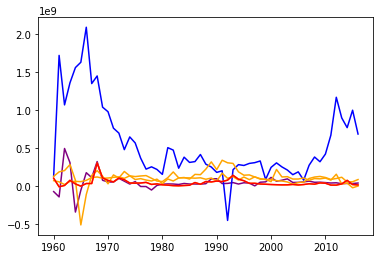

In [109]:
#AID RECEIVED
#Venezuela
row1.plot(color='purple')
#Brazil
row2.plot(color='blue')
#Uruguay
row3.plot(color='orange')
#Paraguay
row3i.plot(color='orange')
#Argentina
row3j.plot(color='orange')
#China
row3.plot(color='red')

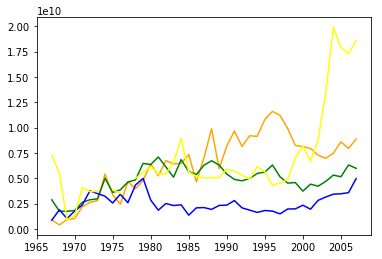

In [110]:
#AID GIVEN
row4.plot(color='orange')
row5.plot(color='green')
row6.plot(color='blue')
row7.plot(color = 'yellow')

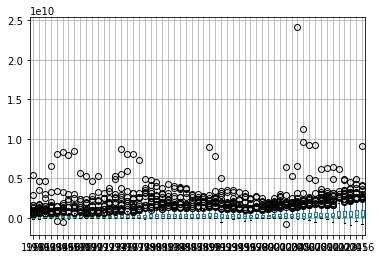

In [111]:
# Essa infformação não é nada útil
aid_rec.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

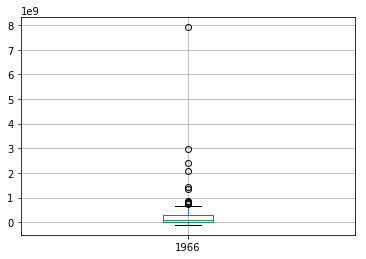

In [112]:
aid_rec.boxplot(column=1966, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

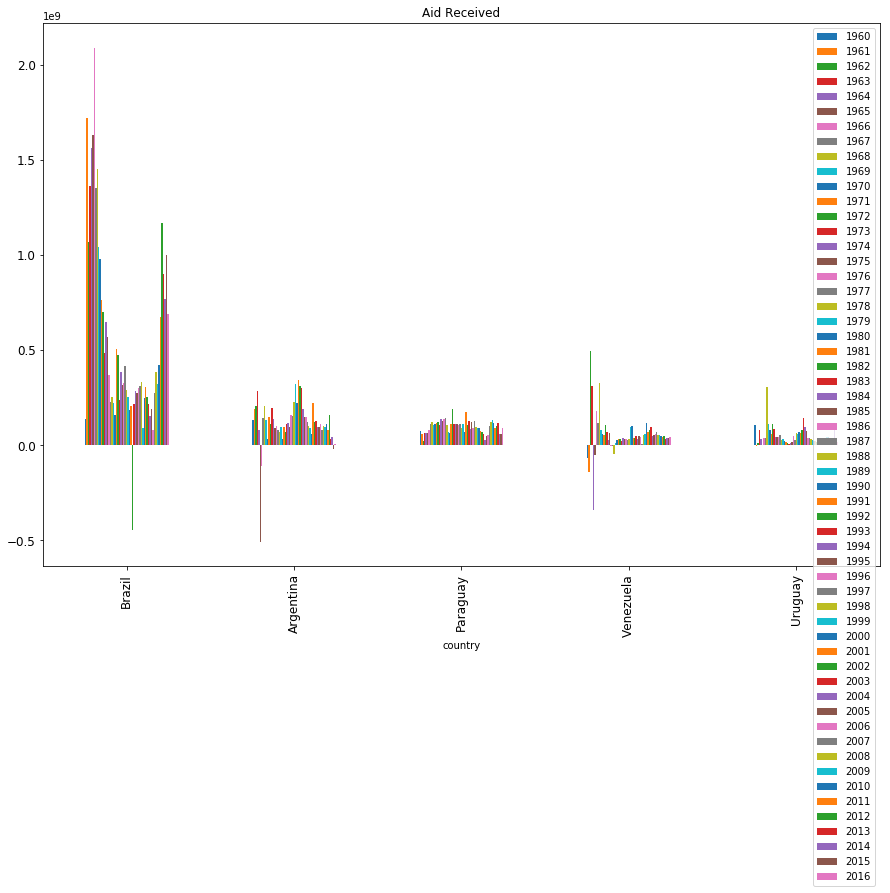

In [113]:
aid_rec.loc[['Brazil', 'Argentina', 'Paraguay', 'Venezuela', 'Uruguay']].plot(kind='bar', title ="Aid Received",figsize=(15,10),legend=True, fontsize=12)

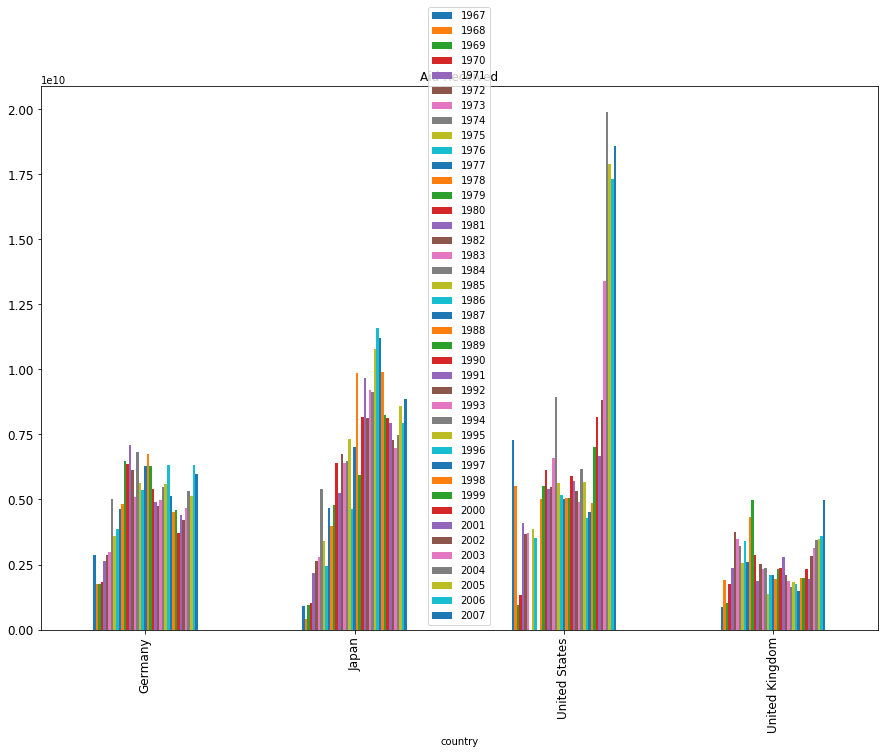

In [114]:
aid_g.loc[['Germany', 'Japan', 'United States', 'United Kingdom']].plot(kind='bar', title ="Aid Received",figsize=(15,10),legend=True, fontsize=12)

## Hipótese #3

In [115]:
murder.head(15)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.070,2.960,NaN,2.300,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.690,NaN,NaN,NaN,1.510,1.100,0.964,1.120,1.010
4,Australia,1.0,1.33,1.46,1.25,1.300,1.390,1.300,1.340,1.540,...,0.978,1.090,1.170,1.010,1.050,1.230,1.060,1.020,1.110,NaN
5,Austria,NaN,NaN,NaN,NaN,NaN,0.976,1.580,1.200,0.965,...,0.609,0.492,0.634,0.428,0.509,0.369,0.401,0.402,0.508,0.417
6,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.521,NaN,NaN
9,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
murder.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,10.000000,16.000000,19.000000,19.000000,19.000000,29.000000,28.000000,30.000000,32.000000,32.000000,...,50.00000,51.000000,49.000000,48.000000,48.000000,50.000000,49.000000,49.000000,39.000000,14.000000
mean,1.718300,1.666937,1.676895,1.890105,1.799789,3.481310,4.125186,4.233733,6.893406,6.233156,...,1.81728,1.908016,1.515745,1.586396,1.515563,1.400680,1.437816,1.291547,1.391821,1.588286
std,1.814934,1.701178,1.737399,2.087930,2.121682,7.174301,9.362643,9.043493,13.870841,12.374951,...,1.88433,2.113289,1.496791,1.553721,1.449739,1.288223,1.476908,1.333178,1.335893,1.328384
min,0.340000,0.206000,0.267000,0.291000,0.271000,0.210000,0.085200,0.206000,0.273000,0.319000,...,0.10300,0.082800,0.074500,0.280000,0.194000,0.188000,0.152000,0.057800,0.166000,0.246000
25%,0.551250,0.476500,0.515500,0.535000,0.523000,0.671000,0.663500,0.654250,0.666750,0.692750,...,0.66825,0.755500,0.666000,0.615500,0.594250,0.607250,0.588000,0.563000,0.568000,0.627500
50%,0.974500,1.150000,1.020000,1.120000,0.917000,1.370000,1.540000,1.380000,1.845000,1.370000,...,1.07000,1.130000,0.960000,0.995500,0.953000,0.976500,0.927000,0.838000,0.870000,1.100000
75%,1.922500,1.610000,1.735000,2.410000,1.780000,4.120000,4.842500,4.767500,5.265000,4.837500,...,1.97000,2.000000,1.770000,1.862500,1.615000,1.507500,1.400000,1.400000,1.560000,2.297500
max,5.250000,5.290000,5.640000,8.220000,7.270000,39.200000,50.400000,50.000000,63.300000,49.000000,...,7.45000,11.000000,6.720000,6.630000,6.190000,4.980000,6.220000,5.820000,5.890000,4.240000


In [117]:
murder.set_index("country", inplace=True)

In [118]:
murder_merc = murder.loc[['Venezuela','Brazil','Uruguay', 'Paraguay', 'Argentina']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


## Hipótese #4

In [ ]:
gdp.describe

In [ ]:
gdp.head()

In [ ]:
gdp.set_index("country", inplace=True)

In [ ]:
data = pd.DataFrame(gdp)

In [ ]:
dados_resumo = gdp.loc['1900':]

In [ ]:
dados_resumo.plot(kind='bar', title ="Aid Received",figsize=(15,10),legend=False, fontsize=12)

In [ ]:
dados_resumo_vene = dados_resumo.loc['Venezuela']

In [ ]:
dados_resumo_vene.plot(kind='bar', title ="Aid Received",figsize=(15,10),legend=False, fontsize=12)

### Conclusões Preliminares Básicas

1. Os países recebem ajuda internacional de forma constante ao longo do tempo, de modo que crises sociais, políticas ou econômicas não afetam significamente os gráficos. Não é possível concluir se os países do Mercosul ajudam mais em situações de crise, para isso seria necessário obter os dados de ajuda dada por país, ou seja, quanto cada país deu para cada país ou dados de quanto os países do Mercosul contribuíram, para que a análise combinada com conhecimento do contexto histórico obtenha conclusões.

2. O PIB por capita dos países do Mercosul após a entrada da Venezuela

3. A violência depois da entrada da Venezuela